#### Question 1:
##### Anova
##### Three archers – Pat, Jack, and Alex are participating in an archery contest. They are shooting at
#####  targets with 10 evenly spaced concentric rings. The rings have score values from 1 through 10
##### assigned to them, with 10 being the highest. Each participant shoots 6 arrow, scoring the
##### following points:
##### Pat – 5, 4, 4, 3, 9, 4
##### Jack – 4, 8, 7, 5, 1, 5
##### Alex – 9, 9, 8, 10, 4, 10
##### Based on the above results we would like to know who the best archer is. In other words our null
##### hypothesis is that the means of all populations are equal.

In [18]:
import pandas as pd

pat = [5, 4, 4, 3, 9, 4]
jack = [4, 8, 7, 5, 1, 5]
alex = [9, 9, 8, 10, 4, 10]


total_score = pat+jack+alex
total_score

[5, 4, 4, 3, 9, 4, 4, 8, 7, 5, 1, 5, 9, 9, 8, 10, 4, 10]

In [19]:
names = (["pat"]*len(pat) + ["jack"]*len(jack) + ["alex"]*len(alex))

In [20]:
data = pd.DataFrame({"Names":names, "Score":total_score})
data

,Names,Score
0,pat,5
1,pat,4
2,pat,4
3,pat,3
4,pat,9
5,pat,4
6,jack,4
7,jack,8
8,jack,7
9,jack,5


In [21]:
full_score_mean = data["Score"].mean()
print(full_score_mean,"IS FULL SCORE MEAN")
pat_sr = pd.Series(pat)
pat_mean = pat_sr.mean()
pad_sum = sum((pat_sr-pat_mean)**2)
print("pad_sum",pad_sum)


6.055555555555555 IS FULL SCORE MEAN
pad_sum 22.833333333333332


In [22]:
jack_sr = pd.Series(jack)
jack_mean = jack_sr.mean()
jack_sum = sum((jack_sr-jack_mean)**2)
jack_sum

30.0

In [23]:
alex_sr = pd.Series(alex)
alex_mean = alex_sr.mean()
alex_sum = sum((alex_sr-alex_mean)**2)
alex_sum

25.333333333333332

In [24]:
SSW = pad_sum + jack_sum + alex_sum
SSW

78.16666666666666

In [25]:
score_sr = pd.Series(data["Score"])
score_mean = score_sr.mean()
score_sum = sum((score_sr - score_mean)**2)
score_sum

124.94444444444446

In [26]:
#sum of squares between groups
SSB = score_sum - SSW
SSB

46.7777777777778

In [27]:
# Here we will divide SSB by degree of freedom 
# since we have 3 samples so it's degree of freedom will be 3-1 =2

result1 = SSB/2
result1

23.3888888888889

In [28]:
# Here we will divide SSw by degree of freedom 
# since we have 18 observations and 3 groups so degree of freedom will be 18 - 3 =15

result2 = SSW/15
result2

5.21111111111111

In [29]:

F = result1/result2
F

4.488272921108745

In [30]:
import scipy
from scipy import stats

f, p= stats.f_oneway(data[data['Names'] == 'pat'].Score,
                      data[data['Names'] == 'jack'].Score,
                      data[data['Names'] == 'alex'].Score)
print(f)
print(p)

4.4882729211087415
0.029667763955533364


In [31]:
critical_value = scipy.stats.f.ppf(q=1-0.05, dfn=2, dfd=15)

<AxesSubplot:>

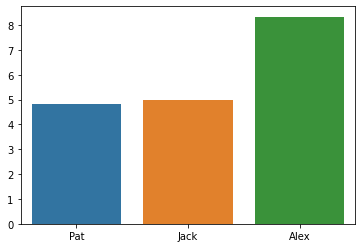

In [32]:
import seaborn as sns

sns.barplot(x = ["Pat", "Jack", "Alex"], y=[pat_mean, jack_mean, alex_mean])
#it shows that alex is best player